In [48]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

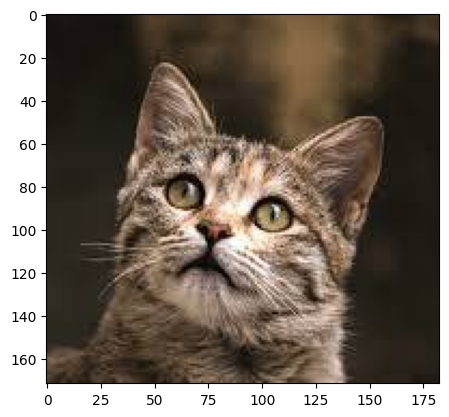

In [49]:
image = cv2.imread('sample.jpeg')
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(img )
img = np.array(img)

In [50]:
def compare(img1 , img2):
  plt.figure(figsize=(10,20))
  plt.subplot(1,2,1)
  plt.title('image 1')
  plt.imshow(img1)
  plt.subplot(1,2,2)
  plt.title('image 2')
  plt.imshow(img2)
  plt.show()

In [51]:
def show_shape(img):
  print(f'shape is {len(img)} x {len(img[0])} x {len(img[0][0])}')

In [59]:
def convert_to_greyscale(img):
  result = np.copy(img)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      result[i][j] = int(0.299 * img[i][j][0] + 0.587 * img[i][j][1] + 0.114 * img[i][j][2])
  return result.astype(np.uint8)

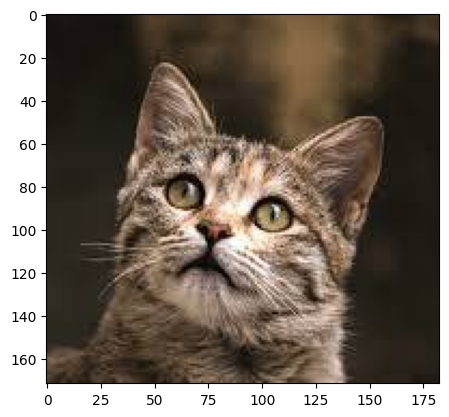

In [60]:
plt.imshow(img)

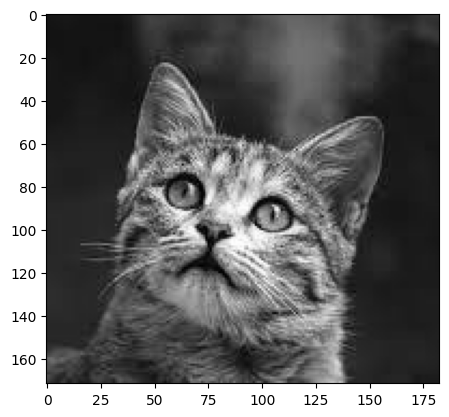

In [61]:
plt.imshow(convert_to_greyscale(img))

In [70]:
def negative(img):
  for i in range(len(img)):
    for j in range(len(img[0])):
      img[i][j] = 255 - img[i][j]

  return img

def horizontal_edge(img):
  def apply_sobel(img, i, j, k):
    sobel_kernel = np.array([[-1, -2, -1],
                              [0, 0,  0],
                              [ 1, 2,  1]])
    sum = np.array([0.0, 0.0, 0.0], dtype=float)
    for x in range(-k, k+1):
      for y in range(-k, k+1):
        if 0 <= i + x < len(img) and 0 <= j + y < len(img[0]):  # Check boundaries
            weight = sobel_kernel[x + k, y + k]
            sum += img[i + x][j + y] * weight
    return np.clip(sum, 0, 255)  # Ensure pixel values are in valid range

  k = 1  # Sobel kernel size
  new_img = np.zeros_like(img)

  for i in range(len(img)):
      for j in range(len(img[0])):
          new_img[i][j] = apply_sobel(img, i, j, k)

  return new_img.astype(np.uint8)

def vertical_edge(img):
  def apply_sobel(img, i, j, k):
    sobel_kernel = np.array([[-1, 0, 1],
                              [-2, 0,  2],
                              [ -1, 0,  1]])
    sum = np.array([0.0, 0.0, 0.0], dtype=float)
    for x in range(-k, k+1):
      for y in range(-k, k+1):
        if 0 <= i + x < len(img) and 0 <= j + y < len(img[0]):  # Check boundaries
            weight = sobel_kernel[x + k, y + k]
            sum += img[i + x][j + y] * weight
    return np.clip(sum, 0, 255)  # Ensure pixel values are in valid range

  k = 1  # Sobel kernel size
  new_img = np.zeros_like(img)

  for i in range(len(img)):
    for j in range(len(img[0])):
      new_img[i][j] = apply_sobel(img, i, j, k)

  return new_img.astype(np.uint8)


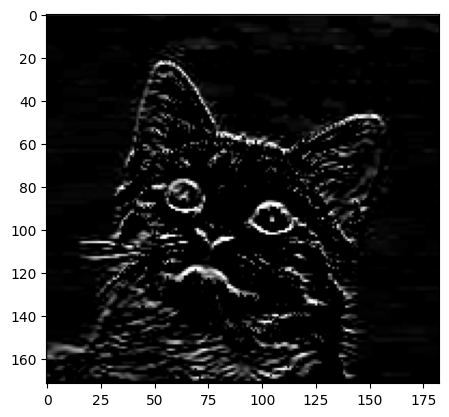

In [72]:
plt.imshow(horizontal_edge(convert_to_greyscale(img)))

In [38]:
img_g.shape

(172, 183)

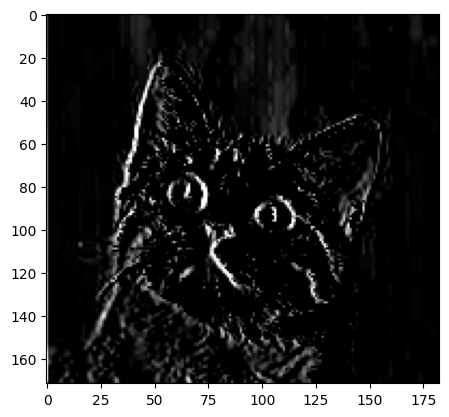

In [73]:
plt.imshow(vertical_edge(convert_to_greyscale(img)))

In [11]:
def smooth_by_average(img):
    def calculate_average(img, i, j, k):
        sum = np.array([0, 0, 0], dtype=float)
        count = 0
        for x in range(i - k, i + k + 1):
            for y in range(j - k, j + k + 1):
                if 0 <= x < len(img) and 0 <= y < len(img[0]):  # Check boundaries
                    sum += img[x][y]
                    count += 1
        return sum / count if count != 0 else sum

    k = 3  # kernel size(changable)
    new_img = np.copy(img)

    for i in range(len(img)):
        for j in range(len(img[0])):
            if k <= i < len(img) - k and k <= j < len(img[0]) - k:
                new_img[i][j] = calculate_average(img, i, j, k)

    return new_img.tolist()


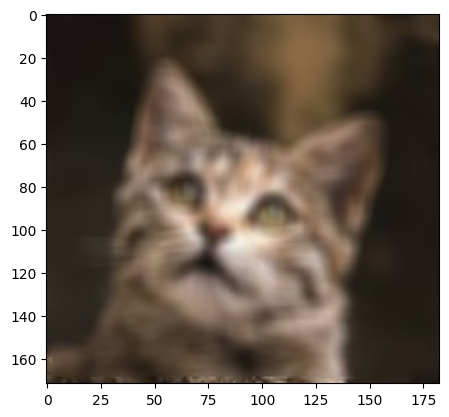

In [12]:
plt.imshow(smooth_by_average(img))

In [13]:
img.shape

(172, 183, 3)

In [14]:
def smooth_by_gaussian(img, sigma = 1):#sigma is devaiton for Gaussian
    def gauss(x, y, sigma):
        return (1/(2*np.pi*sigma**2)) * np.exp(-(x**2 + y**2) / (2 * sigma**2))

    def calculate_average(img, i, j, k, kernel, sigma):
        sum = np.array([0.0, 0.0, 0.0], dtype=float)
        kernel_sum = 0.0
        for x in range(-k, k+2):
            for y in range(-k, k+2):
                if 0 <= i + x < len(img) and 0 <= j + y < len(img[0]):  # Check boundaries
                    weight = gauss(x, y, sigma)
                    sum += img[i + x][j + y] * weight
                    kernel_sum += weight
        return sum / kernel_sum if kernel_sum != 0 else sum

    sigma = 2.0  # standard deviation for Gaussian
    k = 1  # kernel radius, k=1 means 3x3 kernel
    new_img = np.copy(img)

    for i in range(len(img)):
        for j in range(len(img[0])):
            new_img[i][j] = calculate_average(img, i, j, k, gauss, sigma)

    return new_img.astype(np.uint8)  # convert back to uint8


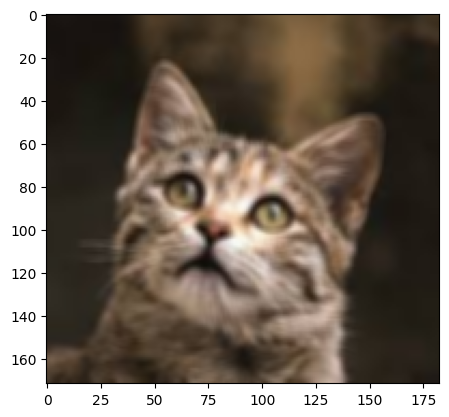

In [15]:
plt.imshow(smooth_by_gaussian(img))

In [98]:
def merge(img1,img2):
  result = np.copy(img1)
  if img1.shape != img2.shape:
    print(f"img 1 shape is {img1.shape} and img 2 shape is {img2.shape}")
    return None
  for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
      for k in range(img1.shape[2]):
        result[i][j][k] = np.sqrt(img1[i][j][k]** 2 + img2[i][j][k] ** 2)
  return result

In [75]:
vertical = vertical_edge(smooth_by_gaussian(convert_to_greyscale(img)))
horizontal = horizontal_edge(smooth_by_gaussian(convert_to_greyscale(img)))

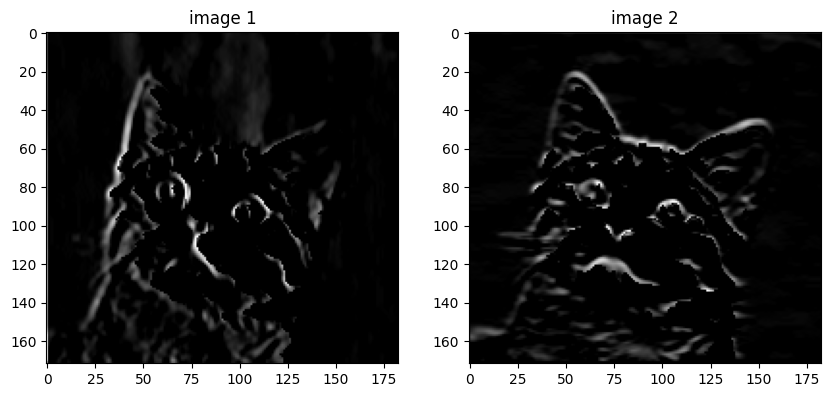

In [81]:
compare(vertical,horizontal)

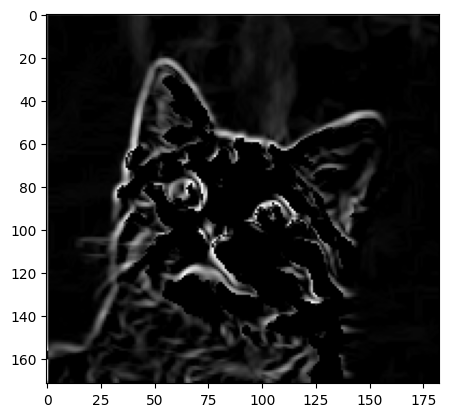

In [99]:
merged = merge(vertical,horizontal)
plt.imshow(merged)

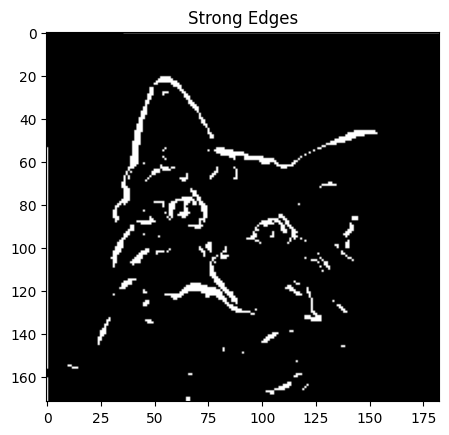

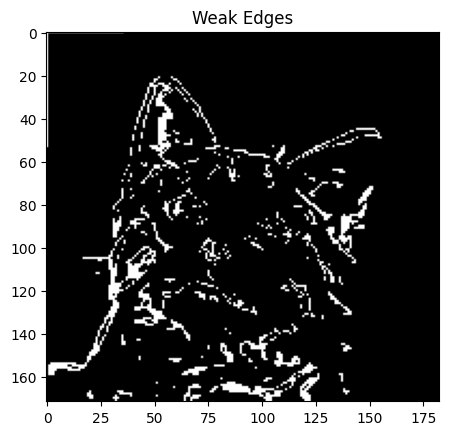

In [100]:
def threshold_edges(edge_img, low_threshold, high_threshold):
  strong_edges = (edge_img > high_threshold).astype(np.uint8) * 255
  weak_edges = ((edge_img >= low_threshold) & (edge_img <= high_threshold)).astype(np.uint8) * 255
  return strong_edges, weak_edges

# Example usage:
low_threshold = 50
high_threshold = 100
strong_edges, weak_edges = threshold_edges(merged, low_threshold, high_threshold)

plt.imshow(strong_edges, cmap='gray')
plt.title('Strong Edges')
plt.show()

plt.imshow(weak_edges, cmap='gray')
plt.title('Weak Edges')
plt.show()